# Import librairies

In [ ]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Import data

In [9]:
chemin = os.path.join('..', 'data', 'data.csv')
df = pd.read_csv(chemin)

In [10]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


# Analyse univariée

In [ ]:
# Fonction qui renvoie le type d'une colonne d'un dataframe pandas
def type_column(df,colonne):
    return df.dtypes[colonne].name

# Fonction qui prends un dataframe en entrée, parcoure les colonnes de ce dataframe et fait un bar_plot si c'est une var quali et un histo si c'est une var quanti
def plot_univarie(df):
    colonnes_liste = df.columns.tolist()
    types_quali = ['object', 'category', 'bool']
    types_quanti = ['int64', 'float64']
    for colonne in colonnes_liste:
        if type_column(colonne) in types_quali:
            
        

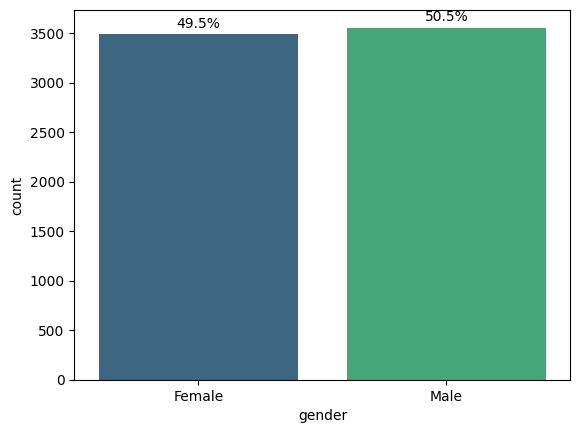

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Le graphique (compte automatique + couleurs par catégorie)
ax = sns.countplot(data=df, x='gender', hue='gender', palette='viridis', legend=False)

# 2. Calcul et affichage du pourcentage sur chaque barre
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=10, xytext=(0, 5), textcoords='offset points')

plt.show()